In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
data = {
    'Height': [150, 160, 170, 180, 155, 165, 175, 185, 158, 168, 178, 190],
    'Weight': [50, 60, 70, 80, 55, 65, 75, 85, 58, 68, 78, 88],
    'Gender': ['Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male']
}

df = pd.DataFrame(data)

# Convert Gender to binary: Female -> 0, Male -> 1
df['Gender'] = (df['Gender'] == 'Male').astype(int)

# Features and target
X = df[['Height', 'Weight']]
y = df['Gender']


In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

      Female       1.00      0.67      0.80         3
        Male       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Confusion Matrix:
[[2 1]
 [0 1]]


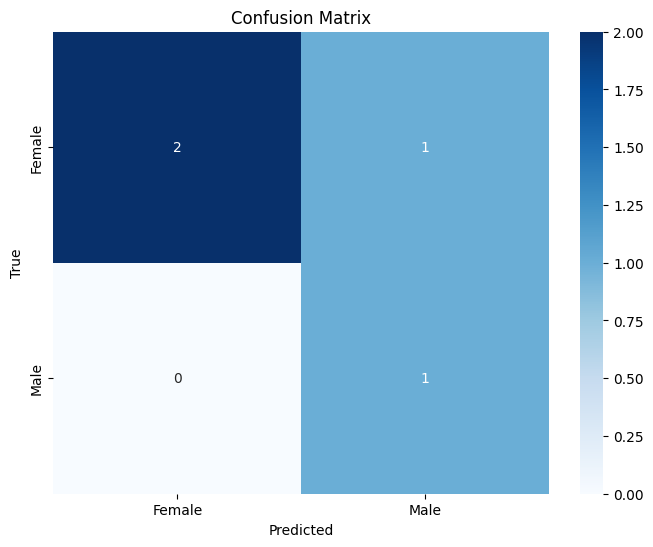

In [29]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Female', 'Male']))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
